比赛链接：https://www.kaggle.com/competitions/spaceship-titanic

notebook 链接：https://www.kaggle.com/code/tiansztianszs/spaceship-titanic-learning

In [1]:
# 开启代码提示
%config Completer.use_jedi = False
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 不折叠数据框
import pandas as pd
pd.set_option('display.max_columns', None) # 显示完整的列
pd.set_option('display.max_rows', None) # 显示完整的行
pd.set_option('display.expand_frame_repr', False) # 设置不折叠数据
pd.set_option('display.max_colwidth', 100)

# 探索训练集

In [3]:
# 导入训练集
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId -- 每位乘客的唯一 ID。每个 Id 采用gggg_pp形式，其中 gggg 表示乘客随行的团体，pp 表示他们在团体中的号码。群体中的人通常是家庭成员，但并非总是如此。（该特征丢弃）
<br>

HomePlanet -- 乘客离开的行星，通常是他们的永久居住行星。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

GryoSleep -- 指示乘客是否在航行期间被选择进入暂停动画状态。处于冷冻睡眠状态的乘客被限制在他们的机舱内。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Cabin -- 乘客居住的机舱号。采用甲板/数字/侧面的形式，其中侧面可以是 P 表示左舷，也可以是 S 表示右舷。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Destination -- 乘客将要下船的星球。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Age -- 乘客的年龄。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

VIP -- 旅客在航行期间是否支付了特殊VIP服务费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

RoomService -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

FoodCourt  -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

ShoppingMall -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Spa -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

VRDeck -- 乘客在泰坦尼克号宇宙飞船的许多豪华设施中收取的费用。（可能有关联，该特征保留。后续要转换为分类数据）
<br>

Name -- 乘客的名字和姓氏。（该特征丢弃）
<br>

Transported  -- 乘客是否被运送到另一个维度。这是目标，您尝试预测的列。

In [4]:
# 删除无用特征
train_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


# 探索测试集

In [5]:
# 导入测试集
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


相对于训练集，测试集没有 Transported 列

In [6]:
# 删除无用特征
test_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


# 合并训练集和测试集

In [7]:
# 合并训练集和测试集
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.shape

(12970, 12)

In [8]:
# 缺失值统计
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64

# 缺失值处理

## HomePlanet特征

In [9]:
all_data.HomePlanet.value_counts(dropna=False)

Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: HomePlanet, dtype: int64

In [10]:
# 使用众数填充 HomePlanet 列的缺失值
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('Earth')
all_data.HomePlanet.value_counts(dropna=False)

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

## CryoSleep特征

In [11]:
all_data.CryoSleep.value_counts(dropna=False)

False    8079
True     4581
NaN       310
Name: CryoSleep, dtype: int64

In [12]:
# 使用众数填充 CryoSleep 列的缺失值
all_data['CryoSleep'] = all_data['CryoSleep'].fillna(False)
all_data.CryoSleep.value_counts(dropna=False)

False    8389
True     4581
Name: CryoSleep, dtype: int64

## Cabin特征

In [13]:
# 将 Cabin 特征拆分为 deck/num/side 三个特征
all_data = pd.concat([all_data, all_data['Cabin'].str.split('/', expand=True)], axis=1)
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [14]:
# 剔除掉 Cabin 特征
all_data.drop('Cabin', axis=1, inplace=True)
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [15]:
# 将列重新命名为 deck/num/side 
all_data.rename(columns={0: 'Deck', 1: 'Num', 2: 'Side'}, inplace=True)
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [16]:
all_data.Deck.value_counts(dropna=False)

F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: Deck, dtype: int64

In [17]:
# 使用众数填充 Deck 特征
all_data['Deck'] = all_data['Deck'].fillna('F')
all_data.Deck.value_counts(dropna=False)

F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64

In [18]:
# 统计数量后发现 Num 特征没有用处，删除 Num 特征
all_data.drop('Num', axis=1, inplace=True)

In [19]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [20]:
all_data.Side.value_counts(dropna=False)

S      6381
P      6290
NaN     299
Name: Side, dtype: int64

In [21]:
# 使用随机数填充 Side 特征
all_data['Side'] = all_data['Side'].fillna(method='ffill')
all_data.Side.value_counts(dropna=False)

S    6524
P    6446
Name: Side, dtype: int64

## Destination 特征

In [22]:
all_data.Destination.value_counts(dropna=False)

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: Destination, dtype: int64

In [23]:
# 使用众数填充缺失值
all_data['Destination'] = all_data['Destination'].fillna('TRAPPIST-1e')
all_data.Destination.value_counts(dropna=False)

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

## Age 特征

<AxesSubplot:ylabel='Density'>

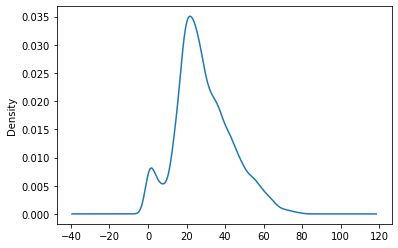

In [24]:
all_data['Age'].plot.density()

<AxesSubplot:ylabel='Density'>

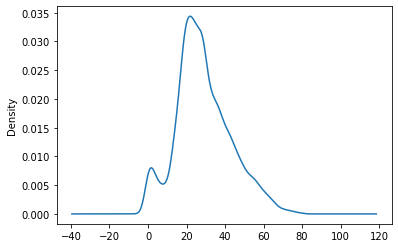

In [25]:
# 使用均值填充缺失值
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())
all_data['Age'].plot.density()

In [26]:
all_data.Age.isnull().sum()

0

## VIP 特征

In [27]:
all_data.VIP.value_counts(dropna=False)

False    12401
NaN        296
True       273
Name: VIP, dtype: int64

In [28]:
# 使用众数填充缺失值
all_data['VIP'] = all_data['VIP'].fillna(False)
all_data.VIP.value_counts(dropna=False)

False    12697
True       273
Name: VIP, dtype: int64

## RoomService 特征

<AxesSubplot:ylabel='Density'>

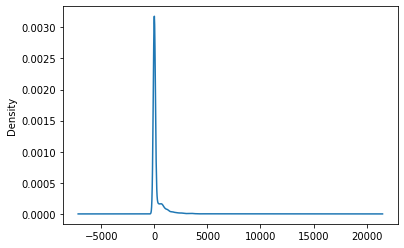

In [29]:
all_data['RoomService'].plot.density()

<AxesSubplot:ylabel='Density'>

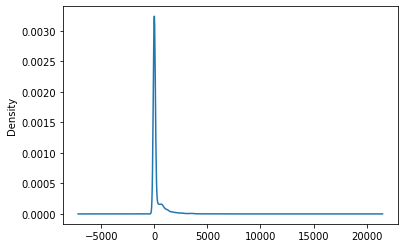

In [30]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['RoomService'] = all_data['RoomService'].fillna(all_data['RoomService'].median())
all_data['RoomService'].plot.density()

In [31]:
all_data.RoomService.isnull().sum()

0

## FoodCourt 特征

<AxesSubplot:ylabel='Density'>

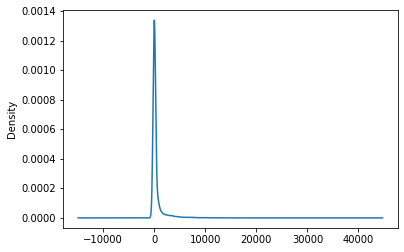

In [32]:
all_data['FoodCourt'].plot.density()

<AxesSubplot:ylabel='Density'>

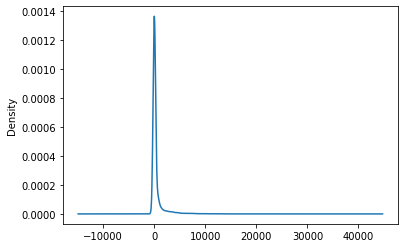

In [33]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(all_data['FoodCourt'].median())
all_data['FoodCourt'].plot.density()

In [34]:
all_data.FoodCourt.isnull().sum()

0

## ShoppingMall 特征

<AxesSubplot:ylabel='Density'>

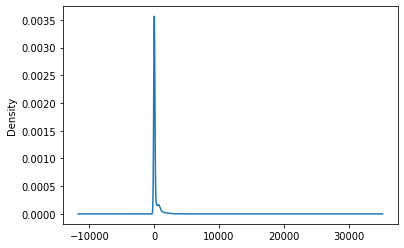

In [35]:
all_data['ShoppingMall'].plot.density()

In [36]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].median())
all_data.ShoppingMall.isnull().sum()

0

## Spa 特征

<AxesSubplot:ylabel='Density'>

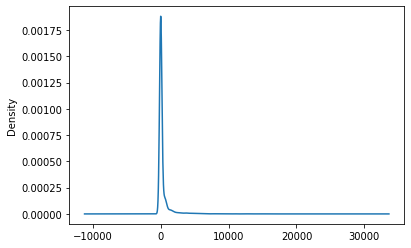

In [37]:
all_data['Spa'].plot.density()

In [38]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['Spa'] = all_data['Spa'].fillna(all_data['Spa'].median())
all_data.Spa.isnull().sum()

0

## VRDeck 特征

<AxesSubplot:ylabel='Density'>

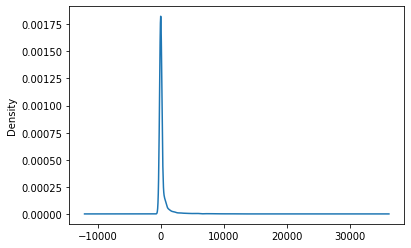

In [39]:
all_data['VRDeck'].plot.density()

In [40]:
# 由于该特征的数值分布不均匀，故使用中位数填充缺失值
all_data['VRDeck'] = all_data['VRDeck'].fillna(all_data['VRDeck'].median())
all_data.VRDeck.isnull().sum()

0

## 判断缺失值是否填充完成

In [41]:
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Deck               0
Side               0
dtype: int64

# 数据类型转化

In [42]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


分类型特征（需要转换为数值）：HomePlanet、CryoSleep、Destination、VIP、Deck、Side
<br>

数值型特征（无需转换）：Age、RoomService、FoodCourt、ShoppingMall、Spa、VRDeck
<br>

目标特征（bool类型）：Transported

In [43]:
categorical_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
# 将非数字的标签分类字段编码为数字
for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes

all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

# 独热编码分类列
# 不过这里得到的是一个数组，因此后续要将它转换为 dataframe
array_hot_encoded = ohe.fit_transform(all_data[categorical_col]).toarray()

# 将数组转换为dataframe
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=all_data.index)

# 得到其他不需要编码的字段
data_other_cols = all_data.drop(columns=categorical_col)

# 连接两个dataframe
all_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)

all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,True


In [45]:
# 将所有特征的列名称转换为 str
all_data.columns = all_data.columns.astype(str)

# 拆分训练集和测试集

In [46]:
train_data.shape, test_data.shape, all_data.shape

((8693, 12), (4277, 11), (12970, 27))

In [47]:
train_data = all_data.iloc[:8693, :]
test_data = all_data.iloc[-4277:, :]
train_data.shape, test_data.shape

((8693, 27), (4277, 27))

In [48]:
test_data.drop(['Transported'], axis=1, inplace=True)

In [49]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8693,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0
8694,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,0.0,9.0,0.0,2823.0,0.0
8695,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0
8696,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,0.0,6652.0,0.0,181.0,585.0
8697,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,635.0,0.0,0.0


In [50]:
train_data['Transported'] = train_data['Transported'].astype("category").cat.codes
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,1


# 清除异常值

In [51]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

clf = LocalOutlierFactor(contamination = 0.02)
# 识别异常值:
outliers = clf.fit_predict(train_data)
# 删除异常值，其中 1 表示正常值，-1 表示异常值:
train_data_cleaned = train_data[np.where(outliers == 1, True, False)]
train_data_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0,1


In [52]:
x_train = train_data_cleaned.drop('Transported', axis = 1)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,24.0,109.0,9.0,25.0,549.0,44.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,303.0,70.0,151.0,565.0,2.0


In [53]:
y_train = train_data_cleaned[['Transported']]
y_train.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [54]:
x_train.shape, y_train.shape

((8519, 26), (8519, 1))

# 平衡标签和样本

In [55]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE( random_state=42)

# print(y_train.value_counts())
# x_resampled, y_resampled = smote.fit_resample(x_train,y_train)
# print(y_resampled.value_counts())

# x_train = x_resampled
# y_train = y_resampled

# 模型融合

In [56]:
# 导入模型
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [57]:
# 网格搜索用于寻找最优参数
from sklearn.model_selection import GridSearchCV

cv_params = {'n_estimators': [400, 500, 600, 700, 800]}

In [58]:
estimators = [
    ('rf', GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, random_state=42), param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)),
    ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42))),
    ('gn', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('xgb', GridSearchCV(estimator=XGBClassifier(), param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)),
    ('lgbm', LGBMClassifier(objective='binary')),
    ('catB', GridSearchCV(estimator=CatBoostClassifier(verbose = 0 ), param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)),
    ('adaB', GradientBoostingClassifier())
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=3000)
)

In [59]:
clf.fit(x_train, y_train)
predictions = clf.predict(test_data.values)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

# 提交结果

In [60]:
sub = pd.DataFrame()
sub['PassengerId'] = pd.read_csv("../input/spaceship-titanic/test.csv", usecols=['PassengerId'])
sub['Transported'] = predictions
sub.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [61]:
sub.shape

(4277, 2)

In [62]:
sub['Transported'] = sub['Transported'].astype('bool')

In [63]:
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [64]:
sub.to_csv('submission.csv',index=False)